# Sistema de recomendaciones de Netflix

Luis Octavio Lopez Martinez - 220096

In [ ]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

: 

#### Cargando el DataSet

In [ ]:
netflix_dataset=pd.read_csv("netflix_dataset.xls")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
new_dataset_netflix = pd.concat([
    pd.read_csv("netflix_movies_detailed_up_to_2025.xls"),
    pd.read_csv("netflix_tv_shows_detailed_up_to_2025.xls")
])
new_dataset_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
new_dataset_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), object

In [ ]:
#Identificar los valores únicos
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())
print("\n\n")

dict = {}
for i in list(new_dataset_netflix.columns):
    dict[i] = new_dataset_netflix[i].value_counts().shape[0]
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769



              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327
              unique count
show_id              31594
type                     2
title                30639
director             1301

# Análisis de datos exploratorios (EDA)

### Análisis de películas versus programas de televisión

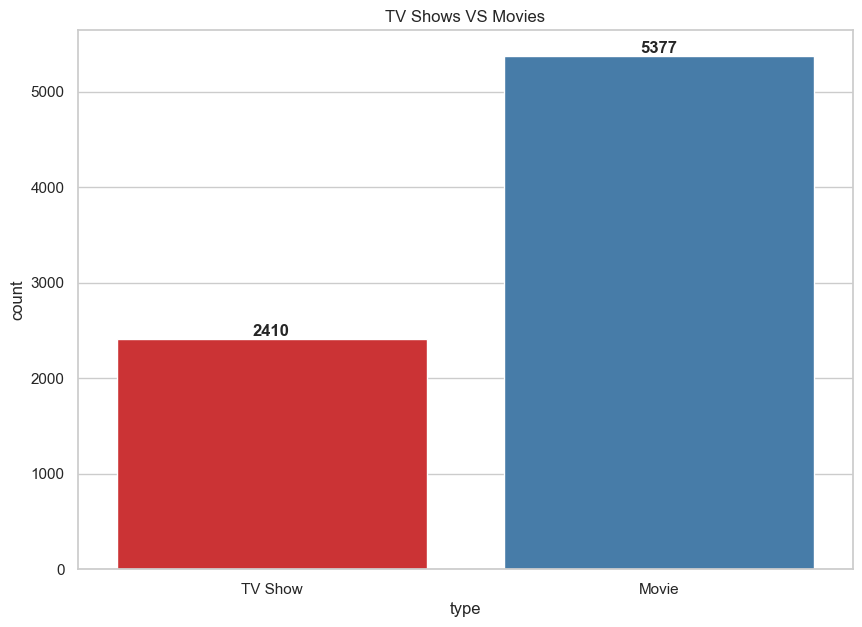

In [ ]:
# Separar los datos por tipo
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Crear el gráfico
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_dataset, palette="Set1")
ax.set_title("TV Shows VS Movies")

# Añadir etiquetas con los totales exactos
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

plt.show()

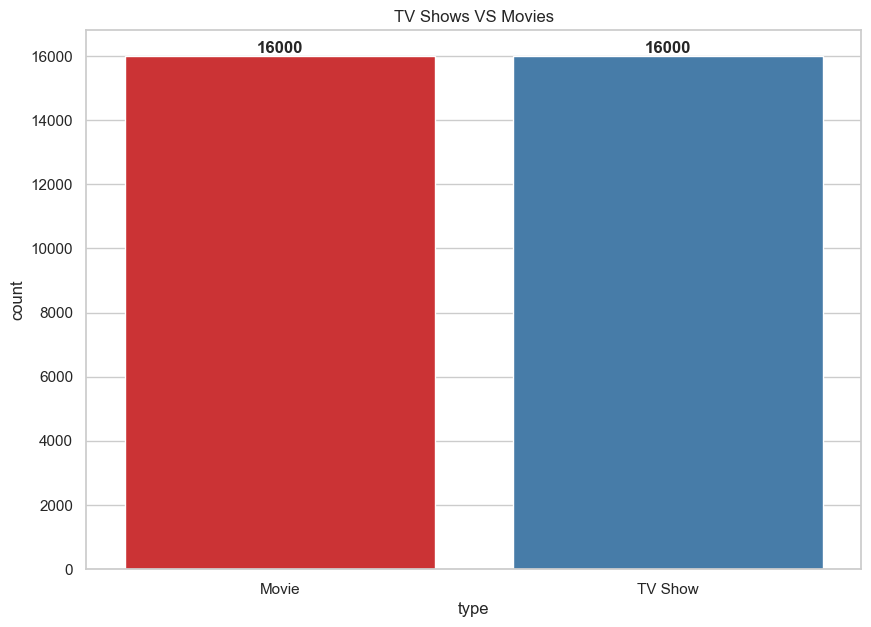

In [ ]:
# Separar los datos por tipo
netflix_shows = new_dataset_netflix[new_dataset_netflix['type'] == 'TV Show']
netflix_movies = new_dataset_netflix[new_dataset_netflix['type'] == 'Movie']

# Crear el gráfico
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=new_dataset_netflix, palette="Set1")
ax.set_title("TV Shows VS Movies")

# Añadir etiquetas con los totales exactos
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

#### ¿En qué mes, un productor puede lanzar su contenido? (Mes cuando se agrega la menor cantidad de contenido) 

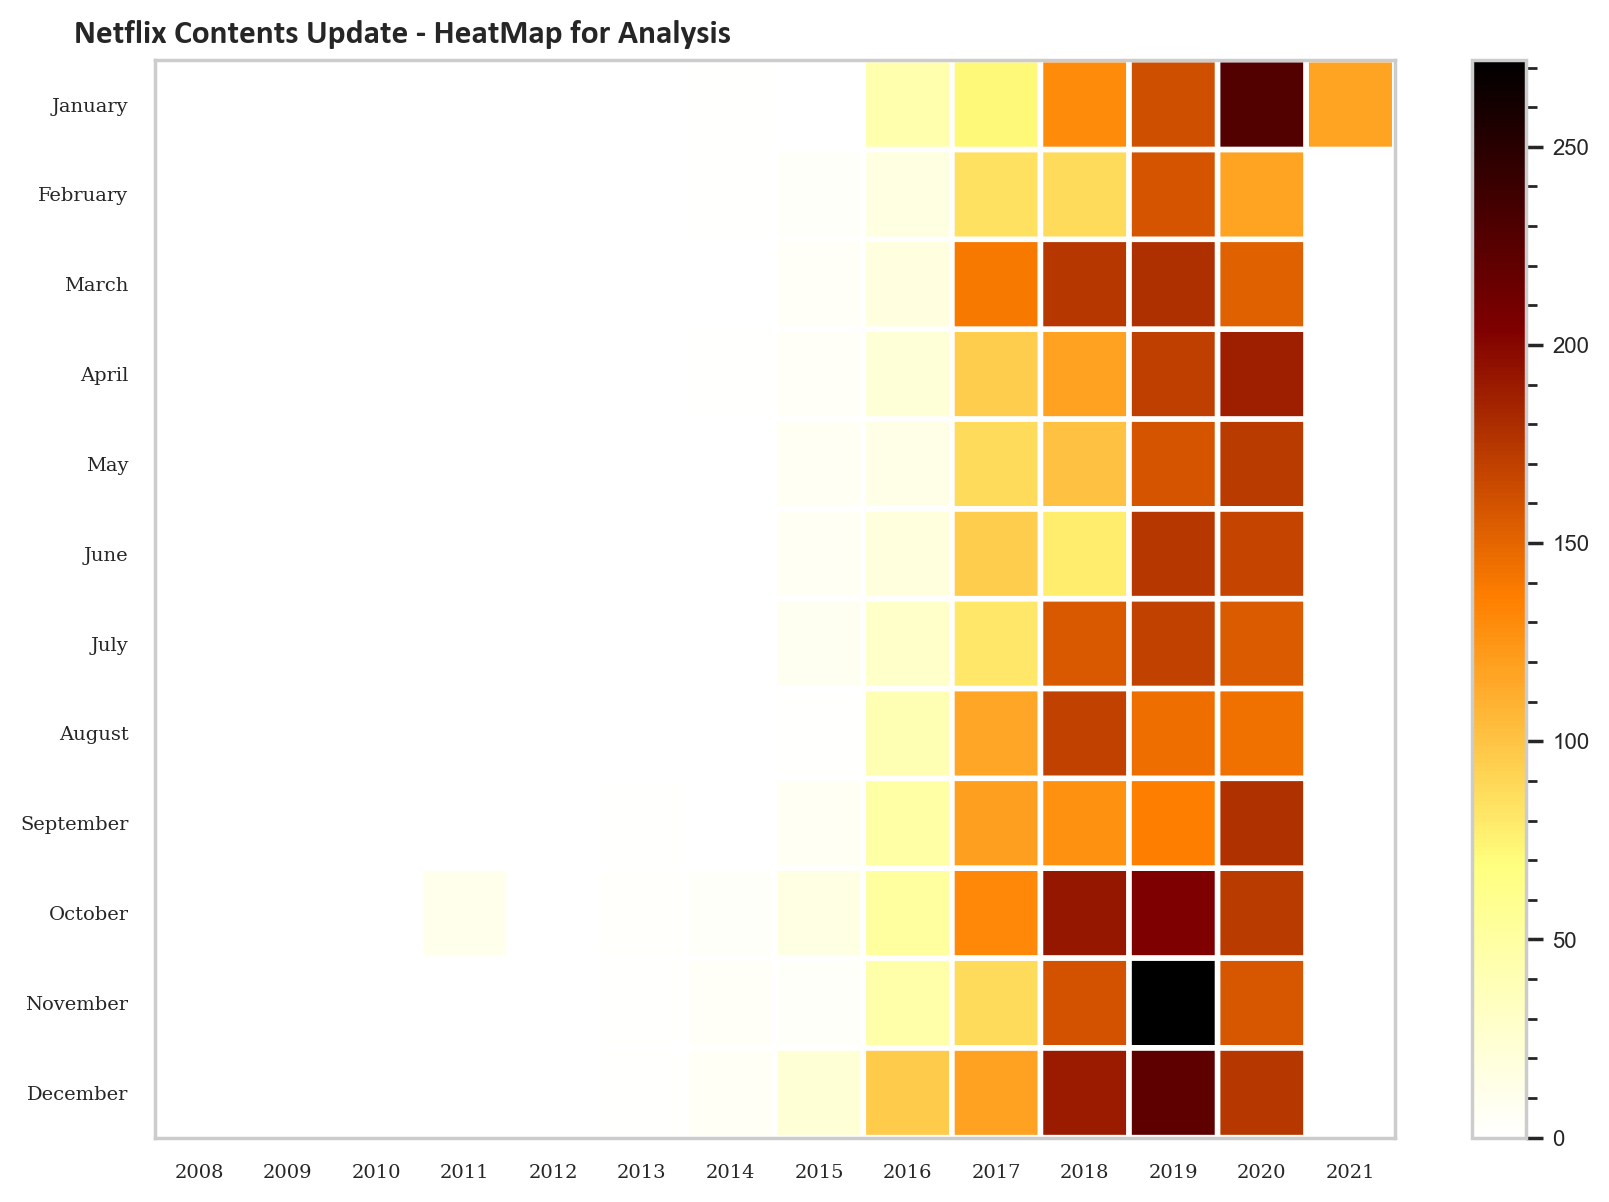

In [ ]:
# Preparar los datos de fecha del dataset combinado
netflix_date = netflix_dataset[['date_added']].dropna()

# Convertir a datetime y extraer año y mes
# Usar format='mixed' para manejar fechas con espacios y formatos variados
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'], format='mixed', errors='coerce')
netflix_date = netflix_date.dropna(subset=['date_added'])
netflix_date['year'] = netflix_date['date_added'].dt.year.astype(str)
netflix_date['month_num'] = netflix_date['date_added'].dt.month

# Mapear números de mes a nombres
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
netflix_date['month'] = netflix_date['month_num'].map(month_map)

# Orden de meses (invertido como en el código original)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# Crear la matriz para el heatmap
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Crear el heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', 
          fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

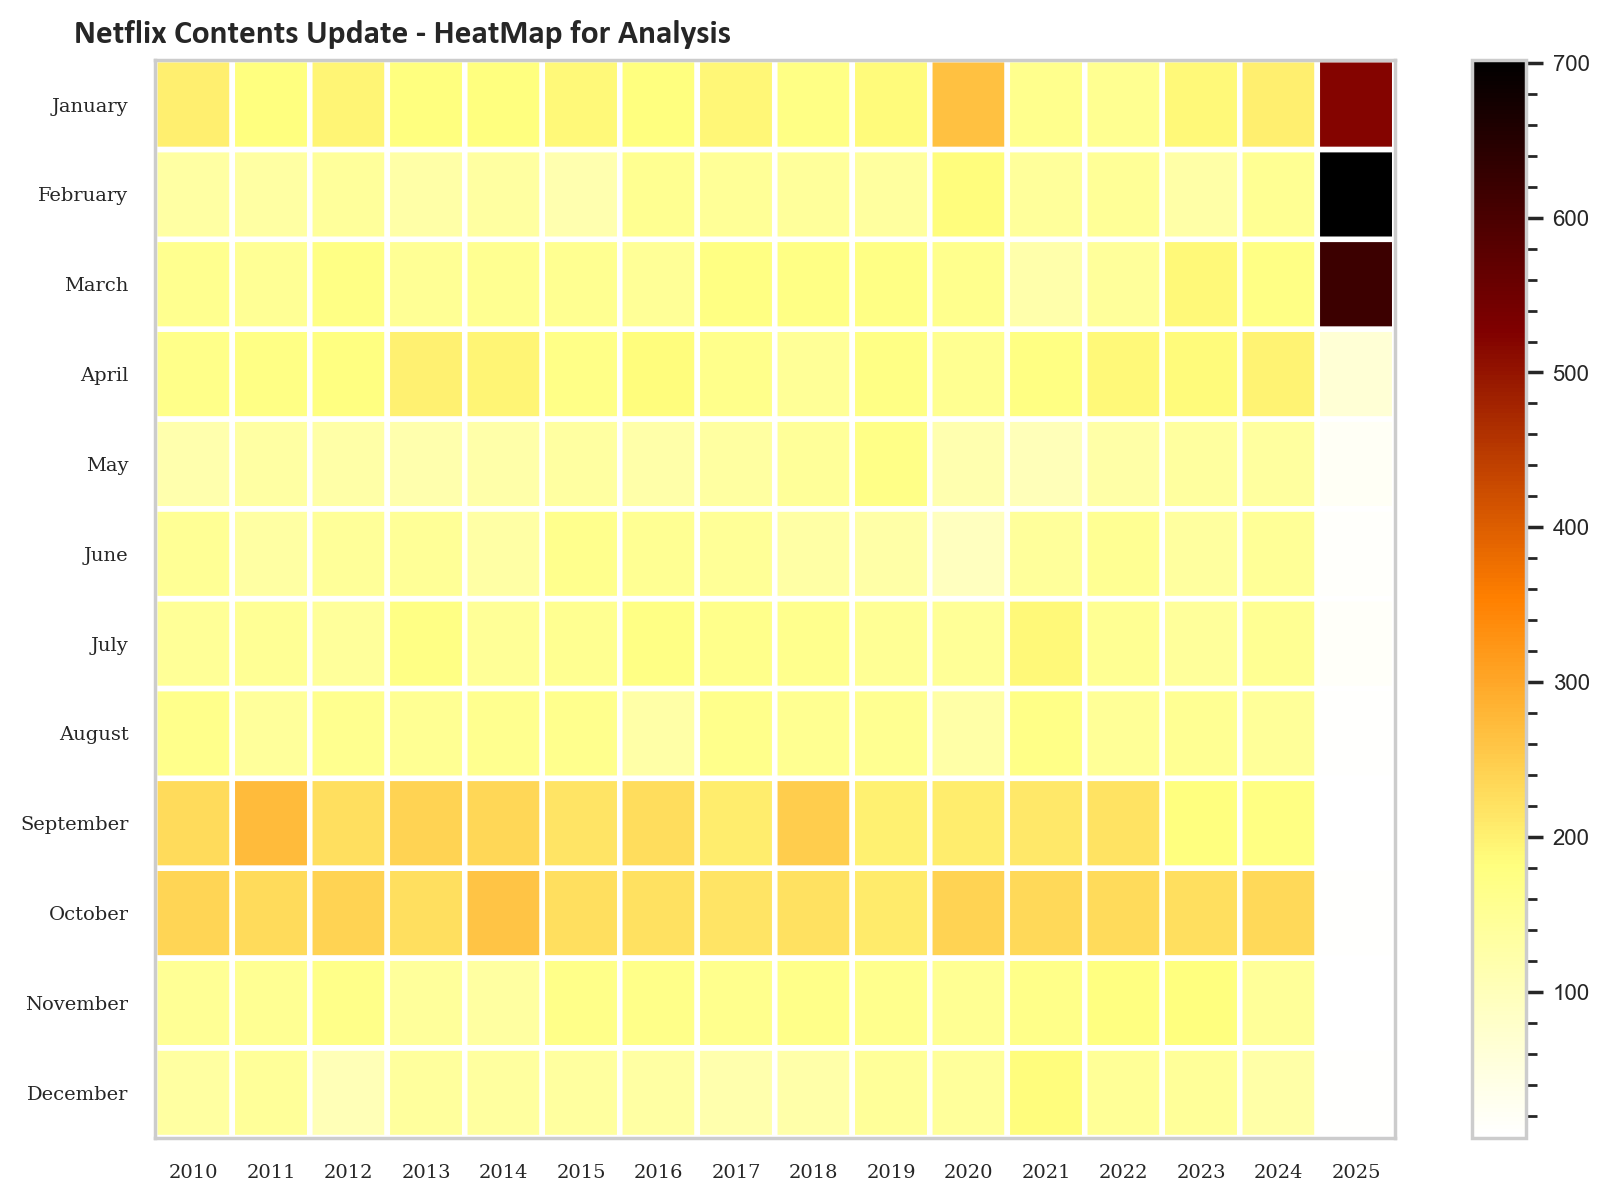

In [ ]:
# Preparar los datos de fecha del dataset combinado
netflix_date = new_dataset_netflix[['date_added']].dropna()

# Convertir a datetime y extraer año y mes
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'])
netflix_date['year'] = netflix_date['date_added'].dt.year.astype(str)
netflix_date['month_num'] = netflix_date['date_added'].dt.month

# Mapear números de mes a nombres
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
netflix_date['month'] = netflix_date['month_num'].map(month_map)

# Orden de meses (invertido como en el código original)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# Crear la matriz para el heatmap
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Crear el heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', 
          fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

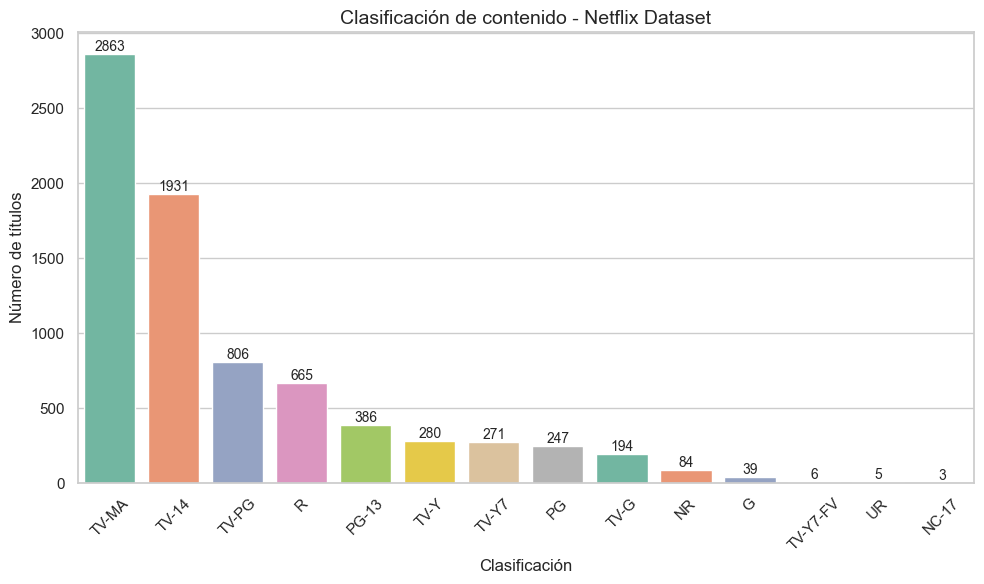

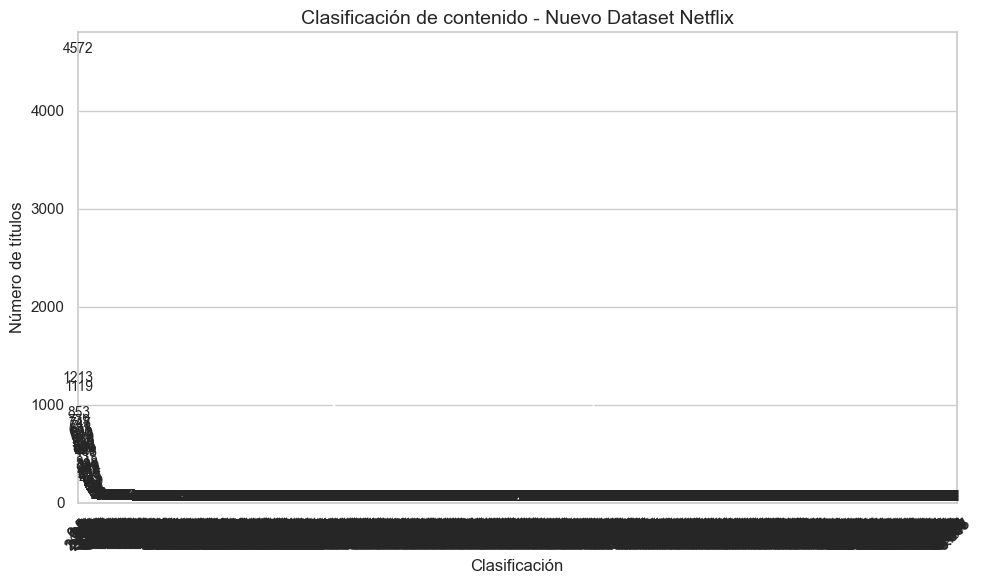

In [ ]:
netflix_dataset = netflix_dataset.dropna(subset=['rating'])
new_dataset_netflix = new_dataset_netflix.dropna(subset=['rating'])

# -------- Gráfico 1: netflix_dataset --------
conteo_rating_1 = netflix_dataset['rating'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_rating_1.index, y=conteo_rating_1.values, palette='Set2')
for i, valor in enumerate(conteo_rating_1.values):
    plt.text(i, valor + 20, str(valor), ha='center', fontsize=10)

plt.title("Clasificación de contenido - Netflix Dataset", fontsize=14)
plt.xlabel("Clasificación")
plt.ylabel("Número de títulos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------- Gráfico 2: new_dataset_netflix --------
conteo_rating_2 = new_dataset_netflix['rating'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_rating_2.index, y=conteo_rating_2.values, palette='Set3')
for i, valor in enumerate(conteo_rating_2.values):
    plt.text(i, valor + 20, str(valor), ha='center', fontsize=10)

plt.title("Clasificación de contenido - Nuevo Dataset Netflix", fontsize=14)
plt.xlabel("Clasificación")
plt.ylabel("Número de títulos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Movie Ratings Analysis


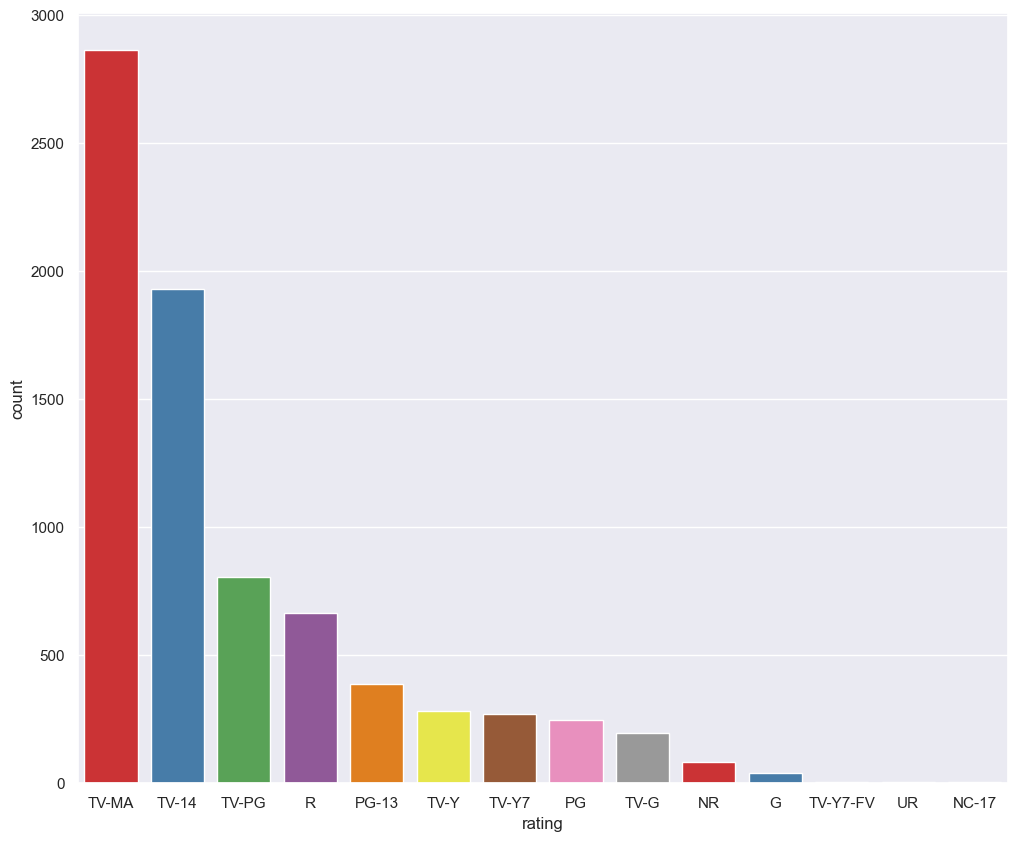

In [ ]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])


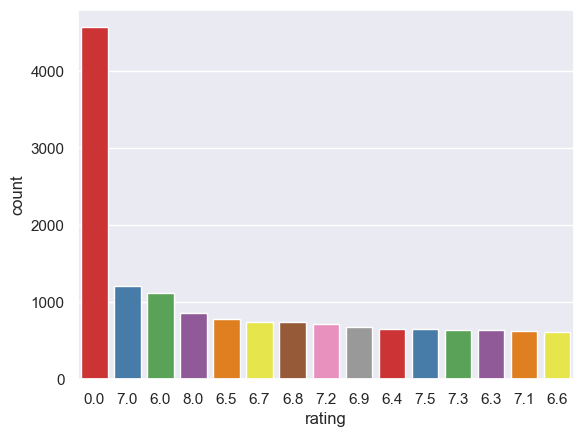

In [ ]:
new_dataset_netflix = new_dataset_netflix.reset_index(drop=True)

ax = sns.countplot(x="rating", data=new_dataset_netflix, palette="Set1", order=new_dataset_netflix['rating'].value_counts().index[0:15])


In [ ]:
imdb_ratings=pd.read_csv('IMDb ratings.xls', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.xls', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.


# Top rated 10 movies in Netflix


In [ ]:
#Top rated 10 movies in Netflix are:
import plotly.express as px

# Merge netflix_dataset and ratings on title and release year
joint_data = pd.merge(
    netflix_dataset,
    ratings,
    left_on=['title', 'release_year'],
    right_on=['Title', 'Release Year'],
    how='inner'
)

# Sort by Rating descending and select top 10
top_rated = joint_data.sort_values(by='Rating', ascending=False).head(10)

fig = px.sunburst(
    top_rated,
    path=['title', 'country'],
    values='Rating',
    color='Rating'
)
fig.show()

Top countries creating contents


In [ ]:
#Top countries creating contents
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
India,251
United States,177
"United States, Canada",9
United Kingdom,9
"United Kingdom, United States",9
Philippines,8
Indonesia,6
"United States, Germany",5
Thailand,5


Year wise analysis


In [ ]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
new_last_fifteen_years = new_dataset_netflix[new_dataset_netflix['release_year']>2005 ]
new_last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


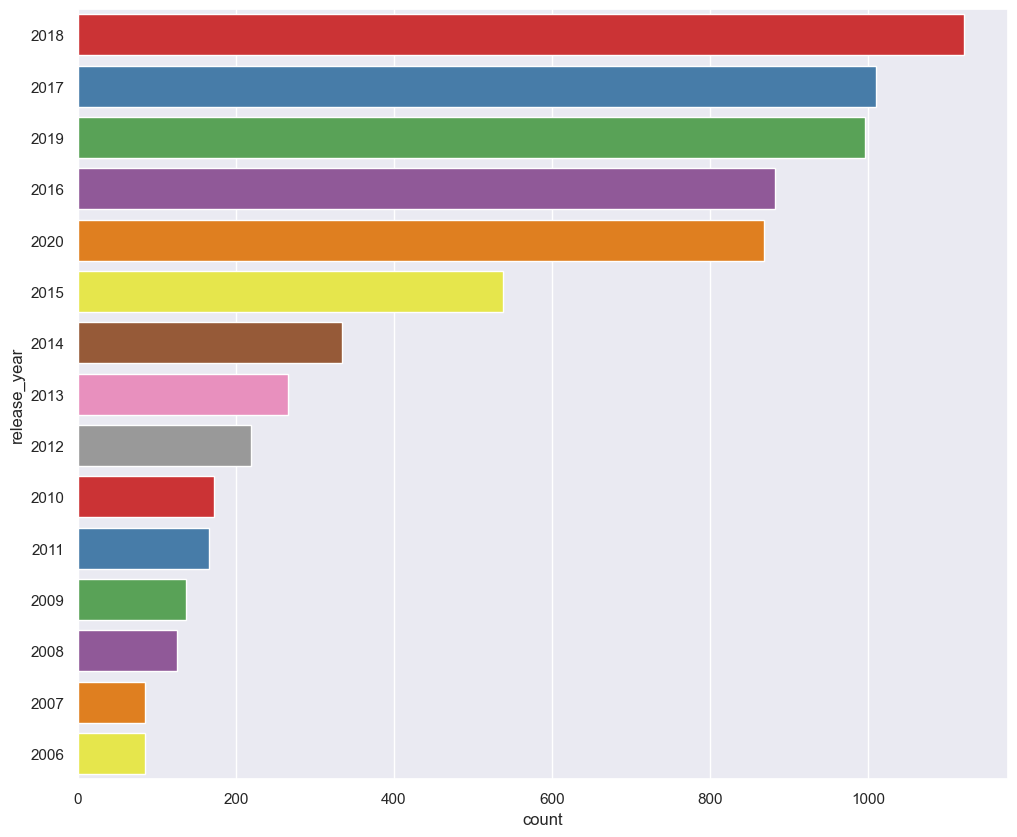

In [ ]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])

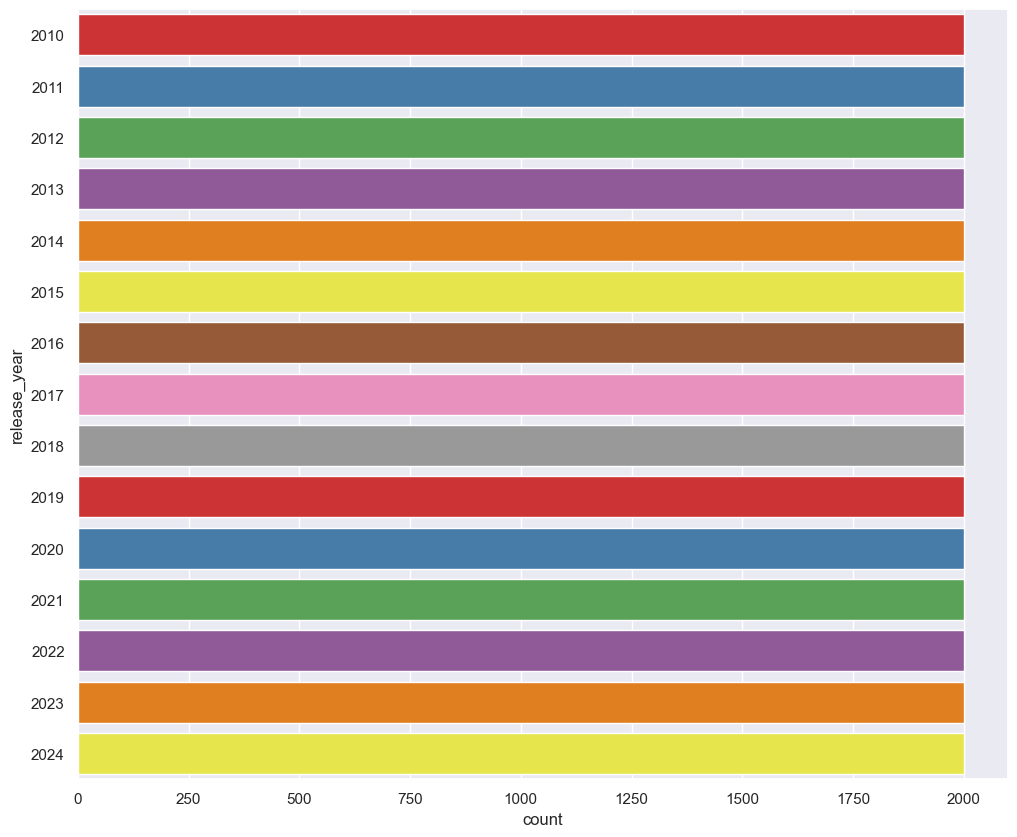

In [ ]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=new_last_fifteen_years, palette="Set1", order=new_dataset_netflix['release_year'].value_counts().index[0:15])

Thus, 2018 was the year when most of the content were released.



Analysis of TV Shows in Netflix


[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'SouthKorea'),
 Text(7, 0, 'Ireland'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Italy')]

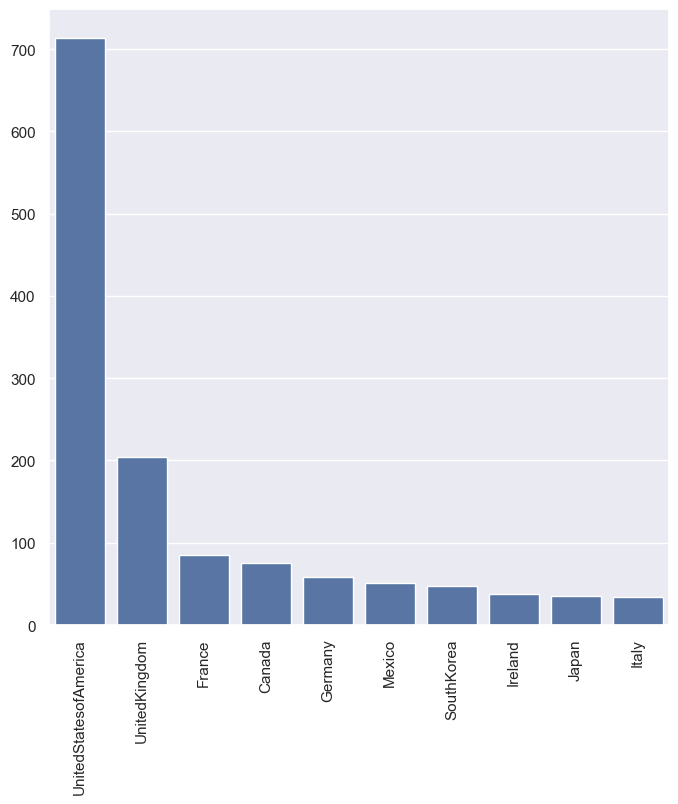

In [ ]:
#Analysis of TV Shows in Netflix

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [ ]:
#Analysis of duration of movies

# Asegurarse de que la columna 'duration' sea de tipo string antes de usar .str
netflix_movies['duration'] = netflix_movies['duration'].astype(str).str.replace(' min', '', regex=False)
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')
netflix_movies['duration']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15995   NaN
15996   NaN
15997   NaN
15998   NaN
15999   NaN
Name: duration, Length: 16000, dtype: float64

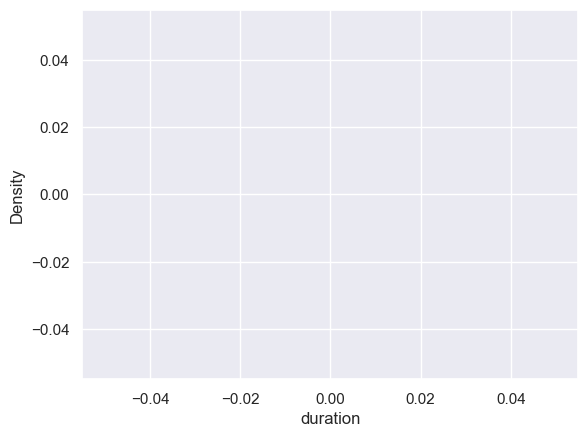

In [ ]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

Analysis of duration of TV shows

In [ ]:
# Seleccionar columnas
features = ['title', 'duration']
durations = new_dataset_netflix[features].copy()

# Limpiar columna 'duration'
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '', regex=False)
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '', regex=False)

# Eliminar filas con NaN
durations = durations.dropna(subset=['no_of_seasons'])

# Convertir a entero
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)

# Ver resultado
durations.head()

,title,duration,no_of_seasons
16000,Running Man,1 Seasons,1
16001,Conan,1 Seasons,1
16002,MasterChef Greece,1 Seasons,1
16003,Prostřeno!,1 Seasons,1
16004,The Talk,1 Seasons,1


<Axes: xlabel='title'>

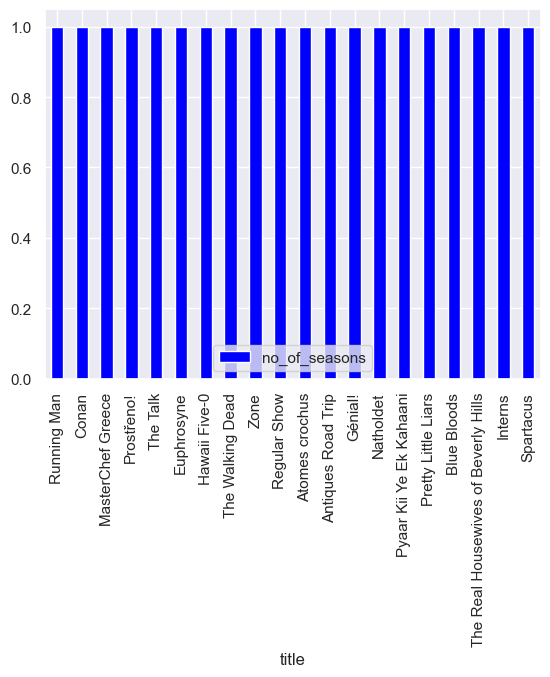

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

# Content-Based Recommendation System
## Plot description based Recommender (Content Based Recommendations)
We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the description feature of our dataset. Let's take a look at the data...

In [ ]:
#Plot description based Recommender (Content Based Recommendations)
new_dataset_netflix['description'].head()

0    A bored and domesticated Shrek pacts with deal...
1    Cobb, a skilled thief who commits corporate es...
2    Harry, Ron and Hermione walk away from their l...
3    Feisty teenager Rapunzel, who has long and mag...
4    As the son of a Viking leader on the cusp of m...
Name: description, dtype: object

In [ ]:
netflix_dataset['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [ ]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar datos y crear TF-IDF (ya es disperso por defecto)
tfidf = TfidfVectorizer(stop_words='english')
new_dataset_netflix['description'] = new_dataset_netflix['description'].fillna('NaN')
tfidf_matrix = tfidf.fit_transform(new_dataset_netflix['description'])

# Verificar el tipo de matriz (debe ser CSR o similar)
print(type(tfidf_matrix))  # Debería ser <class 'scipy.sparse.csr_matrix'>

# Convertir a float32 para ahorrar memoria (opcional)
tfidf_matrix = tfidf_matrix.astype(np.float32)
tfidf_matrix.shape



<class 'scipy.sparse._csr.csr_matrix'>


(32000, 54565)

In [ ]:
f5 = tfidf_matrix[:5]
l5 = tfidf_matrix[-5:]
f5_dense = f5.toarray()
l5_dense = l5.toarray()
feature_names = tfidf.get_feature_names_out()
df_f5 = pd.DataFrame(f5_dense, columns=feature_names)
df_l5 = pd.DataFrame(l5_dense, columns=feature_names)
display(df_f5)
display(df_l5)

,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from scipy.sparse import csr_matrix

# Calcular similitud fila por fila
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(new_dataset_netflix.index, index=new_dataset_netflix['title']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip().lower()
    
    if title not in indices:
        print(f"❌ Title '{title}' not found in dataset!")
        return None

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return new_dataset_netflix['title'].iloc[movie_indices]



In [ ]:
get_recommendations('the wolf of wall street')
get_recommendations('The Aviator')
get_recommendations('That 70s show')

❌ Title 'welcome' not found in dataset!
❌ Title 'avengers: infinity war' not found in dataset!
❌ Title 'dil dhadakne do' not found in dataset!


In [ ]:
#Filling null values with empty string.
filledna=new_dataset_netflix.fillna('')
filledna.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [ ]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))
#Identifying features on which the model is to be filtered.
features=['title','director','cast','description']
filledna=filledna[features]

for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()



,title,director,cast,description
0,shrekforeverafter,mikemitchell,"mikemyers,eddiemurphy,camerondiaz,antoniobande...",aboredanddomesticatedshrekpactswithdeal-makerr...
1,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,kenwatana...","cobb,askilledthiefwhocommitscorporateespionage..."
2,harrypotterandthedeathlyhallows:part1,davidyates,"danielradcliffe,emmawatson,rupertgrint,tobyjon...","harry,ronandhermionewalkawayfromtheirlastyeara..."
3,tangled,"byronhoward,nathangreno","mandymoore,zacharylevi,donnamurphy,ronperlman,...","feistyteenagerrapunzel,whohaslongandmagicalhai..."
4,howtotrainyourdragon,"chrissanders,deandeblois","jaybaruchel,gerardbutler,craigferguson,america...","asthesonofavikingleaderonthecuspofmanhood,shyh..."


In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, dense_output=False)
# Reset index of our main DataFrame and construct reverse mapping as before
filledna = filledna.reset_index(drop=True)
indices = pd.Series(filledna.index, index=filledna['title'])
print("Indices created successfully.", indices.shape)
import difflib

def get_recommendations_new(title, cosine_sim):
    title_clean = title.replace(' ', '').lower()

    # Buscar coincidencia aproximada (fuzzy matching)
    matches = [original_title for original_title in indices.index
               if original_title.replace(' ', '').lower() == title_clean]

    if not matches:
        # Si no hay coincidencia exacta, sugerimos alternativas parecidas
        posibles = difflib.get_close_matches(title, indices.index, n=3, cutoff=0.5)
        sugerencia = f" ¿Quisiste decir: {posibles}?" if posibles else ""
        return f"❌ Título '{title}' no encontrado.{sugerencia}"

    idx = indices[matches[0]]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return filledna['title'].iloc[movie_indices]



Indices created successfully. (32000,)


In [ ]:
# Buscar coincidencias aproximadas
print([t for t in netflix_dataset['title'].unique() if 'amelia' in t.lower()])


['Amelia: A Tale of Two Sisters', 'Camelia la Texana']


In [ ]:
get_recommendations_new('the wolf of wall street', cosine_sim2)

"❌ Título 'Avengers' no encontrado. 🤔 ¿Quisiste decir: ['theavengers', 'avengersconfidential:blackwidow&punisher', 'avengers:ageofultron']?"

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
new_dataset_netflix['description'] = new_dataset_netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(new_dataset_netflix['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(32000, 54565)